
### Clustering Analysis on a Customers Dataset
In this project, I will perform clustering analysis on the Mall Customers Dataset. This dataset includes the `Age`, `Annual Income`, and `Spending Score` of customers. I will use K-Means and DBSCAN clustering algorithms to segment customers based on their behaviors and traits. The primary objective is to understand customer segments to tailor marketing strategies effectively.

#### Data Loading and Initial Exploration

In [1]:
import pandas as pd
import io
import requests

mall_customers = pd.read_csv("Cust_Segmentation.csv")
print(mall_customers.head(5))
mall_customers.describe()

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


#### Data Preprocessing

Standardization

In [2]:
from sklearn.preprocessing import StandardScaler

filtered_mall_customers = mall_customers.drop(columns=['Address','Defaulted','Customer Id'])#Categorical data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(filtered_mall_customers)
mall_customers_normalized = pd.DataFrame(normalized_data, columns=filtered_mall_customers.columns)
print(mall_customers_normalized.head())

        Age       Edu  Years Employed    Income  Card Debt  Other Debt  \
0  0.742915  0.312122       -0.378790 -0.718459  -0.683811   -0.590489   
1  1.489490 -0.766349        2.573721  1.384325   1.414474    1.512962   
2 -0.252518  0.312122        0.211712  0.268032   2.134141    0.801704   
3 -0.750235  0.312122       -0.674041 -0.718459  -0.421643   -0.754467   
4  1.489490 -0.766349        3.311849  5.356249   3.638900    1.716094   

   DebtIncomeRatio  
0        -0.576525  
1         0.391387  
2         1.597554  
3        -0.576525  
4        -0.442507  


#### K-Means Clustering

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(mall_customers_normalized)
labels_kmeans = kmeans.predict(mall_customers_normalized)
mall_customers_normalized['Kmeans_Cluster_Labels'] = labels_kmeans
New_dataframe = mall_customers_normalized.copy()
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=New_dataframe.columns[:-1])
print(centroid_df)

        Age       Edu  Years Employed    Income  Card Debt  Other Debt  \
0  0.800718 -0.165924        0.653019  0.247964  -0.131477   -0.102553   
1 -0.648235  0.006633       -0.624621 -0.484315  -0.315942   -0.373240   
2  0.747795  0.428428        1.048257  1.527106   1.806913    1.988724   

   DebtIncomeRatio  
0        -0.326494  
1        -0.041825  
2         1.093743  


Plotting the result


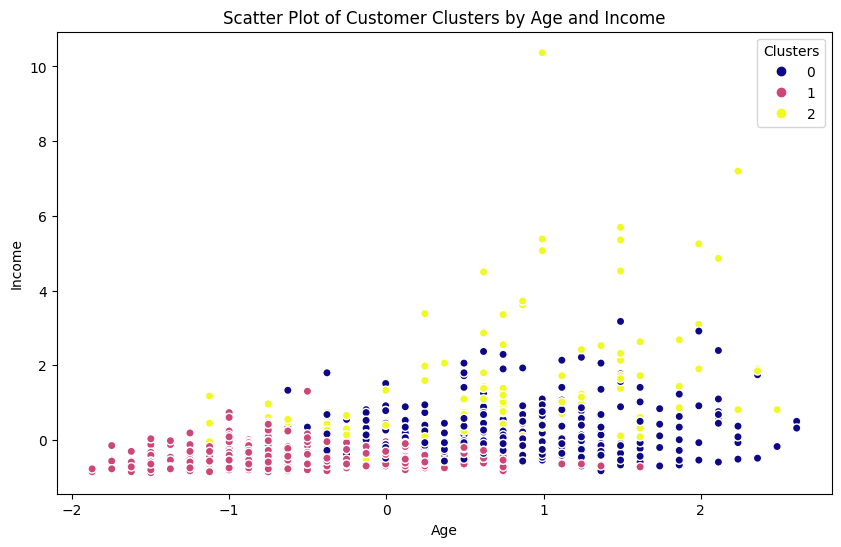

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(mall_customers_normalized['Age'],mall_customers_normalized['Income'],c=mall_customers_normalized['Kmeans_Cluster_Labels'],
    cmap='plasma',  
    alpha=1,       
    edgecolor='w'    
)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('Scatter Plot of Customer Clusters by Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


Cluster 0 : The customers in this cluster generally have lower incomes, and their ages are distributed over a wide range. This may represent a group of customers with relatively stable but not high incomes, including young people and middle-aged people.

Cluster 1 : Cluster 1 seems to represent a younger customer group with lower income. This may be a group of people who have just entered the workplace or students, and their spending power is relatively limited.

Cluster 2 : Cluster 2 represents the higher-income customer group, regardless of age. They may have higher spending power and may be corporate executives, successful professionals, or retirees with relatively good financial conditions.

#### SDBSCAN Clustering

In [5]:
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 5
labels = set()
while len(labels) != 3:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(mall_customers_normalized)
    labels_dbscan = dbscan.labels_
    labels = set(labels_dbscan)
    if len(labels) < 3:
       eps += 0.1
    elif len(labels) > 3:
       min_samples += 1
mall_customers_normalized['DBSCAN_Cluster_Labels'] = labels_dbscan
new_dataframe_dbscan = mall_customers_normalized.copy()
print(new_dataframe_dbscan.head())

        Age       Edu  Years Employed    Income  Card Debt  Other Debt  \
0  0.742915  0.312122       -0.378790 -0.718459  -0.683811   -0.590489   
1  1.489490 -0.766349        2.573721  1.384325   1.414474    1.512962   
2 -0.252518  0.312122        0.211712  0.268032   2.134141    0.801704   
3 -0.750235  0.312122       -0.674041 -0.718459  -0.421643   -0.754467   
4  1.489490 -0.766349        3.311849  5.356249   3.638900    1.716094   

   DebtIncomeRatio  Kmeans_Cluster_Labels  DBSCAN_Cluster_Labels  
0        -0.576525                      1                     -1  
1         0.391387                      2                     -1  
2         1.597554                      2                     -1  
3        -0.576525                      1                      1  
4        -0.442507                      2                     -1  


Plotting the result

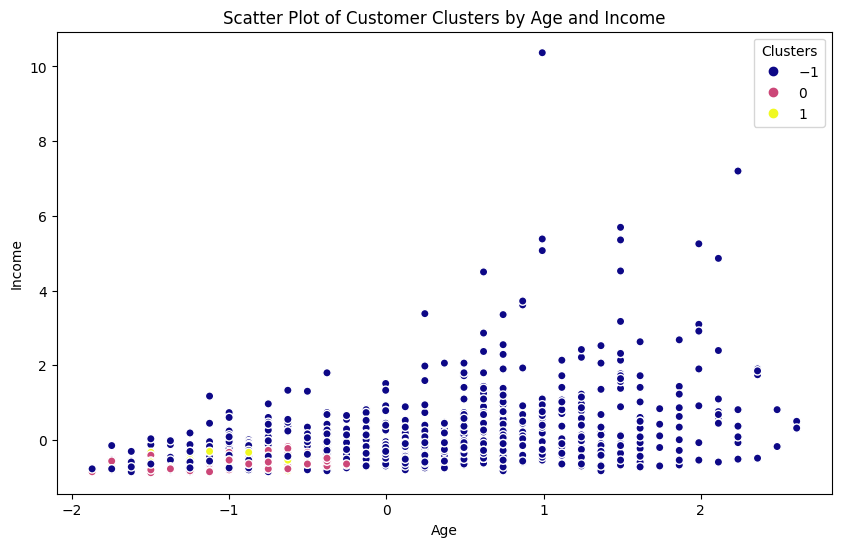

In [6]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(new_dataframe_dbscan['Age'],new_dataframe_dbscan['Income'],c=new_dataframe_dbscan['DBSCAN_Cluster_Labels'],
    cmap='plasma',  
    alpha=1,       
    edgecolor='w'    
)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('Scatter Plot of Customer Clusters by Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

#### Evaluation and Interpretation

In [7]:
from sklearn.metrics import silhouette_score

mall_customers_normalized.head()
mall_customers_normalized = mall_customers_normalized.iloc[:, :-2]
silhouette_kmeans = silhouette_score(mall_customers_normalized, labels_kmeans)
silhouette_dbscan = silhouette_score(mall_customers_normalized, labels_dbscan)
print(f"silhouette_kmeans: {silhouette_kmeans}")
print(f"silhouette_dbscan: {silhouette_dbscan}")

silhouette_kmeans: 0.2172394086659741
silhouette_dbscan: -0.11873626002616372


### comparison

KMeans performs better than DBSCAN in this case, based on the silhouette scores. The KMeans clusters are moderately well-defined, while the DBSCAN clusters are poorly separated or have significant misclassification or noise.